# Visual Computing in the Life Sciences
## Assignment Sheet 3
### Camila Duitama, Mauricio Lacerda

#### Exercise 1 (Dimensionality Reduction, 25 Points)

It is difficult to visualize high-dimensional spaces. In the previous assignment, we therefore focused on
the PCA method for dimensionality reduction. This week, we will try out more advanced dimensionality
reduction methods, compare them, and demonstrate how their hyper parameters affect their results.

a) To answer the questions in this exercise, please use the interactive visualization for t-SNE in the
following link: https://distill.pub/2016/misread-tsne/


- Pick the "three clusters with equal numbers of points" data set. Set the number of points per
class to 10, and number of dimensions to 50. Once run the demo with perplexity=29, and
once with perplexity=30. Explain why there is a big difference in the final 2D embedding?
(3P)


- Try the example "a square grid with equal spacing between points", with 20 points per side.
In the resulting plot with perplexity=100, why are distances between points in the middle of
the square larger than near the boundary? (3P)

- Pick "a square grid with equal spacing between points" data set, with 20 points per side,
and perplexity=2. Run the t-SNE multiple times. You will observe that the square grid
sometimes breaks down into separate smaller clusters. Why? (3P)

- Use different perplexities for "points randomly distributed in a circle"with 100 points. Around
what perplexity value does the resulting visualization start to resemble the input data set?
Explain why the perplexity has to be large enough for the result to look like the input. (3P)

b) In this task we will work with a Mice Protein Expression Dataset (Data_Cortex_Nuclear.xls),
which contains expression levels of 77 proteins, measured in the cerebral cortex of 8 classes of
mice. The classes result from two genotypes (Ts65Dn, which serves as a mouse model of human
down syndrome, vs. normal controls), two treatments (injection of the drug memantine vs. a
saline solution as a control), and two experimental conditions related to context fear conditioning
(context-shock, which should lead to learning, vs. shock-context, in which no learning takes place).
Counting all repeated measurements, there are 1080 instances overall, some with missing data.
You can find more information on the data in the corresponding scientific publication.


- Write a program to read the above data set. Interpolate missing values in a reasonable way.
(1P)

In [197]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib 
from matplotlib.lines import Line2D

data=pd.read_excel('Data_Cortex_Nuclear.xls')
data=data.interpolate(method='linear')

## import doctest
## !python -m doctest function_name.py -v
## doctest.run_docstring_examples(*function, globals(), verbose=True)

In [196]:
#data=pd.read_excel('Data_Cortex_Nuclear.xls')

#frames = [data[data['class']=='c-SC-s'], data[data['class']=='t-SC-s']]
#data = pd.concat(frames)
#print(data.isnull().sum().sum())


- Only for the mice from c-SC-s and t-SC-s classes, use PCA to reduce the 77 dimensional data
set into two dimensions. Visualize the 2D data set in a scatter plot using different colors for
instances from each class. (2P)

Covered variance is [ 0.6283509   0.81130489]


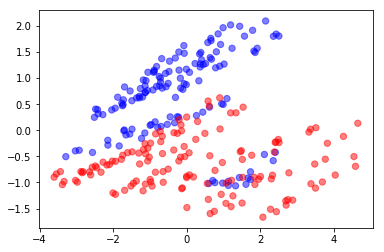

In [185]:
from sklearn.decomposition import PCA

# select only classes t-SC-s and c-SC-s
frames = [data[data['class']=='c-SC-s'], data[data['class']=='t-SC-s']]
data = pd.concat(frames)
# mean or median to interpolate

# map into 2 components
pca = PCA(n_components=2)
# only the 77 variables
projected = pca.fit_transform(data.iloc[:,1:78])
ratios = np.cumsum(pca.explained_variance_ratio_)
print('Covered variance is', ratios)

#define the color for the plot
c=['#0000FF','#FF0000']
color=[c[x=='t-SC-s'] for x in data['class']]
#print(color)
plt.scatter(projected[:,0],projected[:,1], alpha=0.5, \
            color=color, s=40)
plt.show()

- Produce a corresponding plot with ISOMAP, setting the neighborhood attribute to 10 for
dimensionality reduction. Save the resulting 2D visualization. (2P)

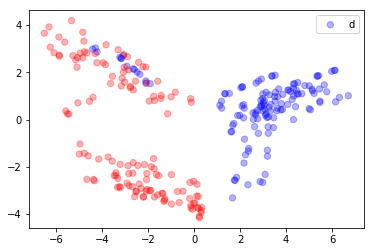

In [186]:
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

X_iso = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(data.iloc[:,1:78])

plt.scatter(X_iso[:,0],X_iso[:,1], alpha=0.3, \
            color=color, s=40)
plt.legend(['d', 's'])
plt.show()
# TODO: name the axes and legend it properly.

- Compare the visualization from ISOMAP to the one from PCA. Which method would you
choose for this particular data set to visualize it in 2D? (1P)

We would choose the second visualization since it shows a better distiction among the clusters. In both visualizations there are three clusters, but in the PCA visualization there are 2 of the clusters with mixed samples, while in the ISOMAP there is only one cluster with minor mix of control samples in the Ts65Dn-saline cluster.

c) Write a program to read the breast-cancer-wisconsin.xlsx file again. Interpolate missing
values as before, and keep all variables. Use t-SNE for dimensionality reduction. Run t-SNE
with a random initial distribution of points and different perplexities, i.e., 5, 10, 20, 30, 40, and 50. Visualize the 2D data set in a scatter plot using different colors for cases from benign and
malignant classes. Store your visualizations. (2P) 


In [194]:
dt_bc=pd.read_excel('breast-cancer-wisconsin.xlsx')
dt_bc=dt_bc.interpolate()
perplexity=[5,10,20,30,40,50]
result=dict()
for each in perplexity:
    name='X_TSNE_'+str(each)
    result[name]=manifold.TSNE(perplexity=each, n_components=2).fit_transform(dt_bc.iloc[:,1:10])

c=['#0000FF','#FF0000']
color=[c[x==2] for x in data['class']]
    
for i in result:
    plt.scatter(i[:,0],i[:,1], alpha=0.3, \
            color=color, s=20)
    plt.show()


TypeError: string indices must be integers

- Repeat this experiment, except this time use PCA to create the initial distribution of points. Note that the implementation in scikit-learn allows you to select the initialization using a keyword parameter. (2P)


In [ ]:
's'

- Compare the diagrams from random initialization to the ones with PCA initialization. For which perplexity values did the 2D embeddings fail to nicely separate the two data clusters? Why? (3P)


#### Exercise 2 (Graph Visualization, 25 Points)


In this exercise you will learn how to use the graph visualization package Graphviz via its Python
bindings.

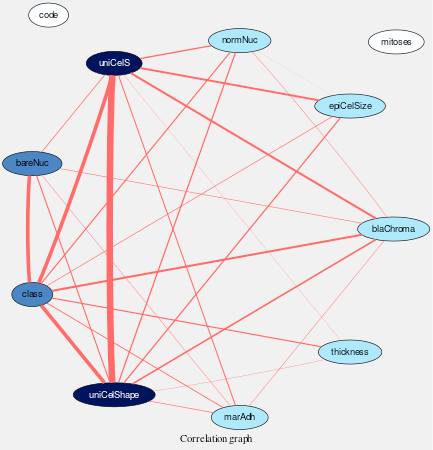

a) Using the same dataset as in assignment sheet 2, write code to fill in the missing values. Then
compute the Pearson correlation between any pair of variables, and store them in a matrix. (5P)

In [13]:
import pandas as pd
import numpy as np
#import matplotlib.mlab as mlab
#import matplotlib.pyplot as plt
#import matplotlib 
#from matplotlib.lines import Line2D
from scipy.stats import pearsonr

In [20]:
dt2=pd.read_excel('reduced_dataset.xlsx')
dt2.head()

size = len(dt2.columns)
pcm = np.zeros((size, size),dtype=float)
for i in range(size):
    for j in range(size):
        # the function returns a tuple with the pearson correlation as the 
        # first element and the p-value (not used here) as the second.
        pcm[i][j], _ = pearsonr(dt2.iloc[:,i], dt2.iloc[:,j])
print (pcm)

[[ 1.          0.6449125   0.65458908  0.58259124  0.55842816  0.71600136]
 [ 0.6449125   1.          0.90688191  0.68496504  0.75572098  0.81790374]
 [ 0.65458908  0.90688191  1.          0.70775594  0.73594845  0.81893374]
 [ 0.58259124  0.68496504  0.70775594  1.          0.67264457  0.81020812]
 [ 0.55842816  0.75572098  0.73594845  0.67264457  1.          0.75661615]
 [ 0.71600136  0.81790374  0.81893374  0.81020812  0.75661615  1.        ]]


b) Install the Graphviz library and its Python interface. Generate and visualize some simple graph.
You can find the software and its documentation at https://pypi.python.org/pypi/graphviz.
(5P)

In [21]:
from graphviz import Digraph

dot = Digraph()
self.root.drawme(dot)
dot.render(file, view=True)


c) Create a graph from the correlation matrix and visualize it. Represent each variable as a node in
the graph. Insert an edge between two variables whenever the Pearson correlation between them
exceeds the threshold rho > 0:6. (4P)

d) Modify the visual attributes of edges to reflect the magnitude of the correlation. (3P)

e) Produce an alternative visualization with a circular layout. Color the nodes so that there are four
set of nodes, one color for having at least one correlation more than 0:9 to other nodes, another for
having at least a correlation 0:8 < rho max <= 0:9, one for having a correlation 0:6 < rho max <= 0:8
and the last for the remaining nodes. (5P)

f) Answer the following questions:

- At the selected threshold, which nodes are disconnected from the rest of the graph and what
do they indicate? (1P)

- If two nodes A and B are strongly correlated, and node C is strongly correlated with node
B, can we conclude that node C will be also strongly correlated with node A? (1P)

- Where have you already seen the four nodes connected to node "class" through its thickest
edges? (1P)